In [1]:
from helpers import *
from create_album_jsons import *
%load_ext autoreload
%autoreload 2

/Users/tugba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
rankings = [
    {
        'album': 'Even in Arcadia',
        'artist': 'Sleep Token',
        'spotify_id': '1lS7FeRcSUuIGqyg99UGpj',
        'Yagiz': [1, 3, 0, 8, 5],
        'Tugba': [1, 3, 7, 0, 5],
    },
    {
        'album': 'The New Abnormal',
        'artist': 'The Strokes',
        'spotify_id': '2xkZV2Hl1Omi8rk2D7t5lN',
        'Yagiz': [0, 8, 6, 2, 1],
        'Tugba': [8, 1, 0, 2, 6],
    },
    
    {
        'album': 'BODIES',
        'artist': 'Thornhill',
        'spotify_id': '5bJeb7bvHrxNvZ6UskCoqm',
        'Yagiz': [1, 2, 10, 9, 5],
        'Tugba': [10, 2, 3, 5, 1],
    },
    
    {
        'album': 'Skinty Fia',
        'artist': 'Fontaines D.C.',
        'spotify_id': '0aVN6rMKthfuAdDXn8RTXf',
        'Yagiz': [8, 5, 0, 7, 3],
        'Tugba': [8, 3, 5, 1, 4],
    },
    {
        'album': 'Radiant Dark',
        'artist': 'If I Were You',
        'spotify_id': '2qGyywbFxucSBkPMPgfQ2w',
        'Yagiz': [5, 2, 9, 1, 0],
        'Tugba': [2, 4, 9, 5, 1],
    },
]

ranking_df = pd.DataFrame(rankings)

In [3]:
ranking_loss_df = compute_ranking_loss_df(ranking_df)
ranking_loss_df.head()

,album,artist,spotify_id,Yagiz,Tugba,loss
0,Even in Arcadia,Sleep Token,1lS7FeRcSUuIGqyg99UGpj,"[1, 3, 0, 8, 5]","[1, 3, 7, 0, 5]",6
1,The New Abnormal,The Strokes,2xkZV2Hl1Omi8rk2D7t5lN,"[0, 8, 6, 2, 1]","[8, 1, 0, 2, 6]",8
2,BODIES,Thornhill,5bJeb7bvHrxNvZ6UskCoqm,"[1, 2, 10, 9, 5]","[10, 2, 3, 5, 1]",12
3,Skinty Fia,Fontaines D.C.,0aVN6rMKthfuAdDXn8RTXf,"[8, 5, 0, 7, 3]","[8, 3, 5, 1, 4]",14
4,Radiant Dark,If I Were You,2qGyywbFxucSBkPMPgfQ2w,"[5, 2, 9, 1, 0]","[2, 4, 9, 5, 1]",10


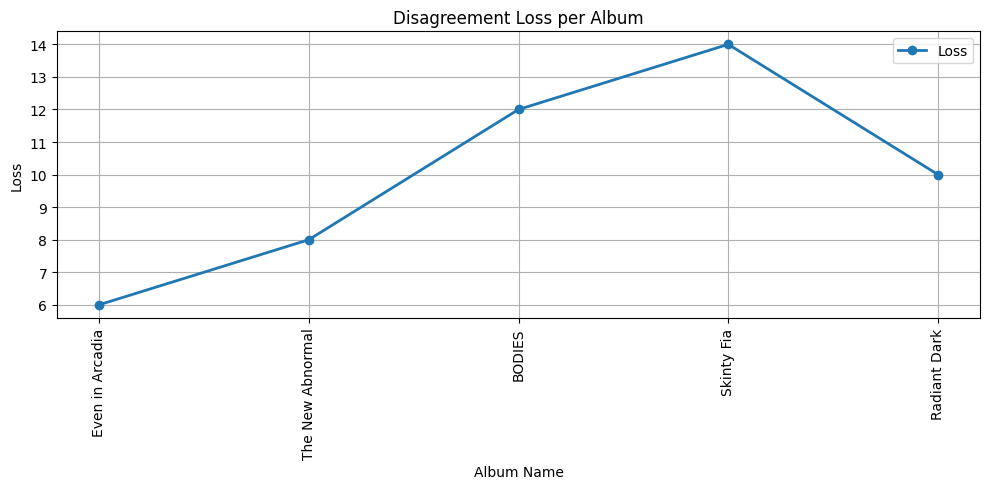

In [4]:
plot_ranking_losses(ranking_loss_df)

In [5]:
import json

output = [
    {
        'album': row['album'],
        'artist': row['artist'],
        'spotify_id': row['spotify_id'],
        'loss': row['loss'],
        'Yagiz': row['Yagiz'],
        'Tugba': row['Tugba'],
    }
    for _, row in ranking_loss_df.iterrows()
]

with open('albums.json', 'w') as f:
    json.dump(output, f, indent=2)

In [6]:
for album in rankings:
    generate_album_json(
        album_id=album['spotify_id'],
        album_slug=make_slug(album['album']),
        yagiz_ranks=album['Yagiz'],
        tugba_ranks=album['Tugba']
    )

Saved albums/even-in-arcadia.json
Saved albums/the-new-abnormal.json
Saved albums/bodies.json
Saved albums/skinty-fia.json
Saved albums/radiant-dark.json
